In [139]:
### Library Imports
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
# Function Imports
import sys
sys.path.append('/Users/mburley/TradingIndicators/Functions')  # Add the 'Functions' directory to the Python path
from IndicatorFunctions import import_stock_data, calculate_macd, plot_function


In [140]:
### Load in Stock Data
tickers = ['AAPL', 'CSCO']
start_date = '2023-01-01'
stock_data = import_stock_data(tickers, start_date)
stock_data.tail()


[*********************100%%**********************]  2 of 2 completed


Price        Date       Close                   High                    Low  \
Ticker                   AAPL       CSCO        AAPL       CSCO        AAPL   
331    2024-04-29  173.500000  47.779999  176.029999  48.310001  173.100006   
332    2024-04-30  170.330002  46.980000  174.990005  47.689999  170.000000   
333    2024-05-01  169.300003  46.840000  172.710007  47.570000  169.110001   
334    2024-05-02  173.029999  46.790001  173.419998  47.119999  170.889999   
335    2024-05-03  184.296707  47.130001  187.000000  47.400002  182.660004   

Price              
Ticker       CSCO  
331     47.580002  
332     46.970001  
333     46.680000  
334     46.599998  
335     46.845001

In [141]:
### MACD Function for Multiple Stocks
macd_df, macd_vals = calculate_macd(tickers, stock_data)
print(macd_df.tail())
print("MACD values list: ", macd_vals)

         CSCO      AAPL  AAPL_Signal  CSCO_Signal
331 -0.355712 -0.995047    -1.583202    -0.311367
332 -0.428584 -0.865787    -1.439719    -0.334810
333 -0.491962 -0.836814    -1.319138    -0.366240
334 -0.539999 -0.507028    -1.156716    -0.400992
335 -0.544358  0.655898    -0.794193    -0.429665
MACD values list:  {'AAPL': 0.6558980668328331, 'CSCO': -0.5443584279686462}


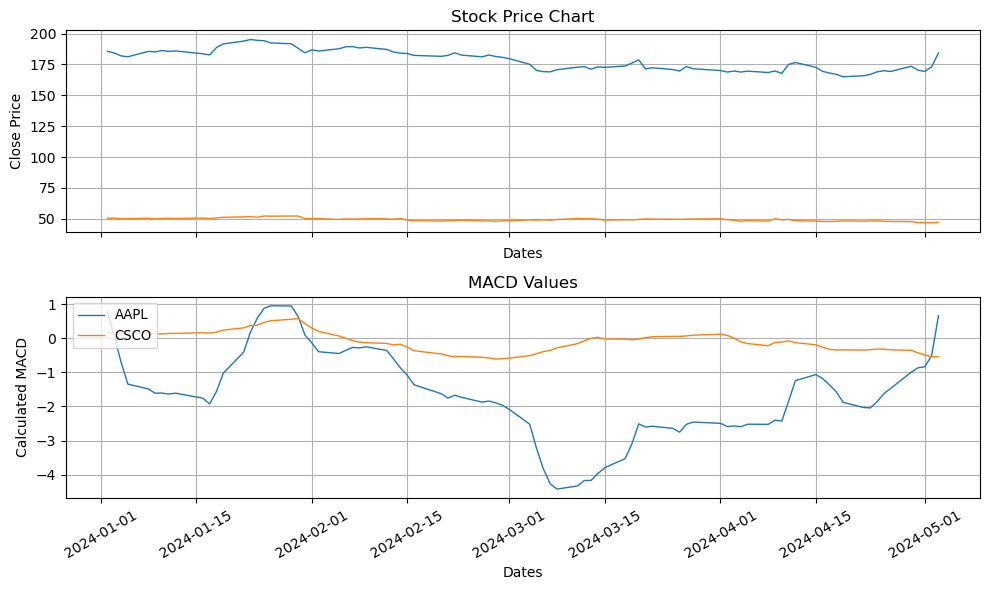

In [142]:
### Plot MACD and Stock Dataframes
plot = plot_function(stock_data, macd_df, tickers, indicator_type = 'MACD')
plot

In [143]:
### Perform Filtering
for t in tickers:
    # Initialize Buy Signal and Sell Signal columns
    macd_df[f"{t}_Buy_Signal"] = ''
    macd_df[f"{t}_Sell_Signal"] = ''

    # Define buy condition: 
    # A buy condition is met if the MACD line of the current period is greater than the Signal line 
    # and the MACD line of the previous period is less than the Signal line of the previous period.
    buy_condition = (macd_df[t].shift(1) < macd_df[f"{t}_Signal"].shift(1)) & (macd_df[t] > macd_df[f"{t}_Signal"])

    # Define sell condition: 
    # A sell condition is met if the MACD line of the current period is less than the Signal line 
    # and the MACD line of the previous period is greater than the Signal line of the previous period.
    sell_condition = (macd_df[t].shift(1) > macd_df[f"{t}_Signal"].shift(1)) & (macd_df[t] < macd_df[f"{t}_Signal"])
    
    macd_df.loc[buy_condition, f"{t}_Buy_Signal"] = 'BUY'
    macd_df.loc[sell_condition, f"{t}_Sell_Signal"] = 'SELL'

macd_df.tail()


,CSCO,AAPL,AAPL_Signal,CSCO_Signal,AAPL_Buy_Signal,AAPL_Sell_Signal,CSCO_Buy_Signal,CSCO_Sell_Signal
331,-0.355712,-0.995047,-1.583202,-0.311367,,,,
332,-0.428584,-0.865787,-1.439719,-0.334810,,,,
333,-0.491962,-0.836814,-1.319138,-0.366240,,,,
334,-0.539999,-0.507028,-1.156716,-0.400992,,,,
335,-0.544358,0.655898,-0.794193,-0.429665,,,,


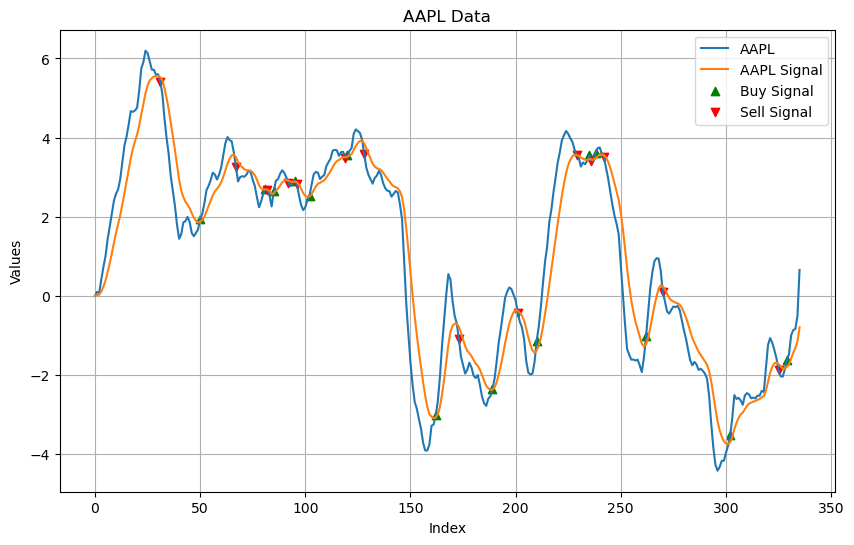

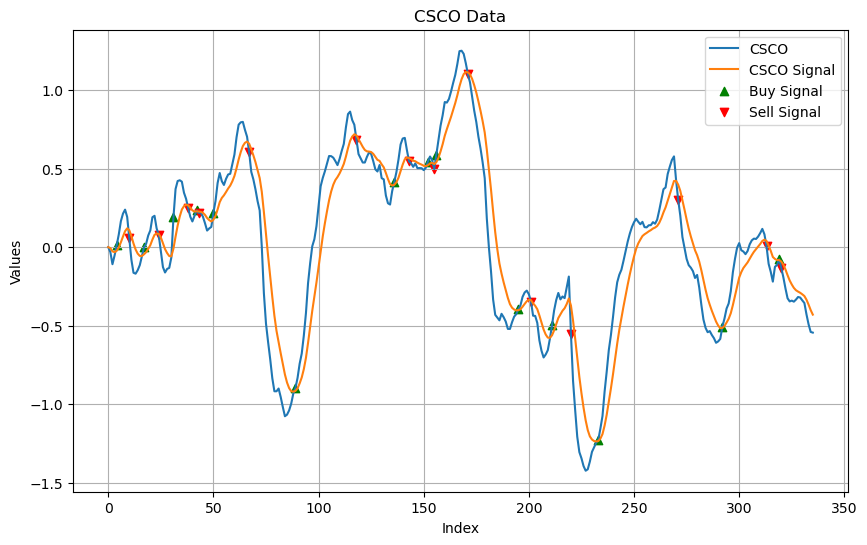

In [144]:
### Plot Ticker Data
# Iterate through tickers to plot each ticker's data
for t in tickers:
    plt.figure(figsize = (10, 6))
    plt.plot(macd_df.index, macd_df[t], label = t)
    plt.plot(macd_df.index, macd_df[f"{t}_Signal"], label = f"{t} Signal")
    
    # Plot Buy Signals
    buy_indices = macd_df.index[macd_df[f"{t}_Buy_Signal"] == 'BUY']
    plt.scatter(buy_indices, macd_df[macd_df[f"{t}_Buy_Signal"] == 'BUY'][t], color = 'green', marker = '^', label = 'Buy Signal')
    
    # Plot Sell Signals
    sell_indices = macd_df.index[macd_df[f"{t}_Sell_Signal"] == 'SELL']
    plt.scatter(sell_indices, macd_df[macd_df[f"{t}_Sell_Signal"] == 'SELL'][t], color = 'red', marker = 'v', label = 'Sell Signal')
    
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title(f'{t} Data')
    plt.legend()
    plt.grid(True)
    plt.show()